
                                      ** ---- Table of contents ----¶**
1. Importing Libraries
2. Load Dataset
3. Meta information of Dataframe
4. Checking for NaN values
5. Feature Extraction
6. Feture selction
7. Train & Test Split
8. Training models
                ✔️ Decision Tree Classifier
                ✔️ Random Forest Classifier
                ✔️ KNeighbors Classifier
                ✔️ Extra Trees Classifier
                



In [ ]:
pip install tld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,  ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from tld import get_tld, is_tld

In [ ]:
data = pd.read_csv('/content/malicious_phish.csv')
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
data.isnull().sum()

url     0
type    0
dtype: int64

In [ ]:
count = data.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [ ]:
data.columns

Index(['url', 'type'], dtype='object')

In [ ]:
data.dropna()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


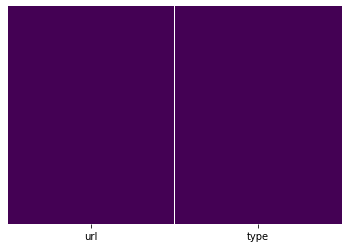

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
count = data.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

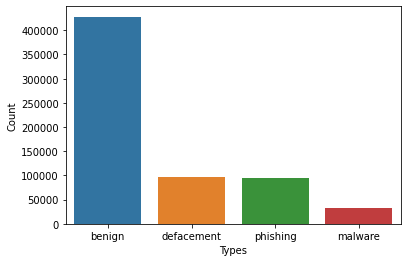

In [ ]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

In [ ]:
data['url'] = data['url'].replace('www.', '', regex=True)
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [ ]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
data['Category'] = data['type']
data = data.replace(rem)

Feature Extraction




In [ ]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

(0.0, 20000.0)

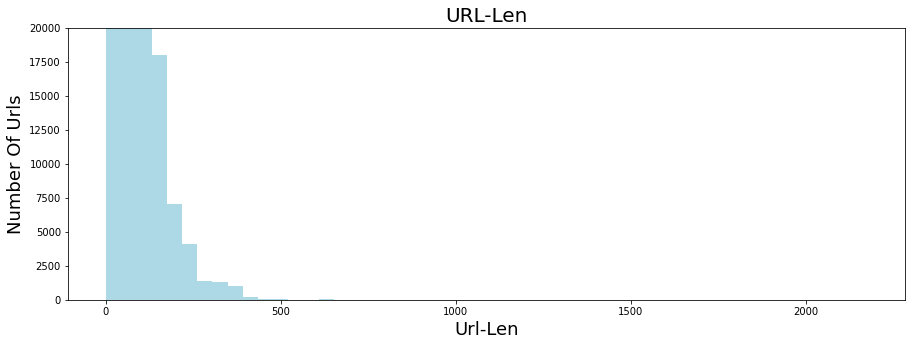

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(data['url_len'],bins=50,color='LightBlue')
plt.title("URL-Len",fontsize=20)
plt.xlabel("Url-Len",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,20000)

In [ ]:
data['hostname_length'] = data['url'].apply(lambda i: len(urlparse(i).netloc))

(0.0, 10000.0)

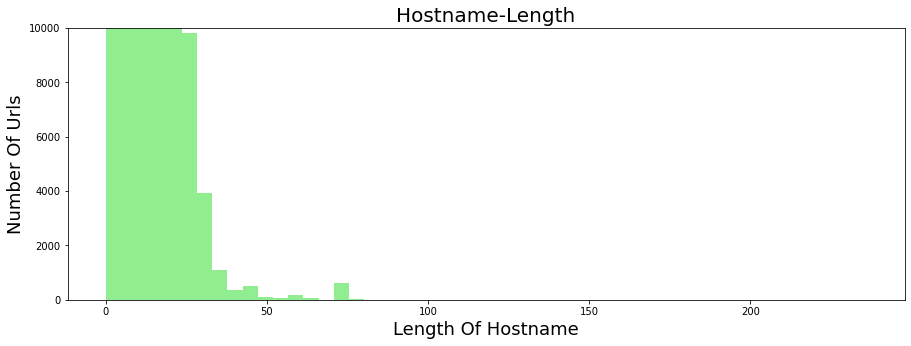

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(data['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,10000)

In [ ]:
#Path Length
data['path_length'] = data['url'].apply(lambda i: len(urlparse(i).path))

(0.0, 10000.0)

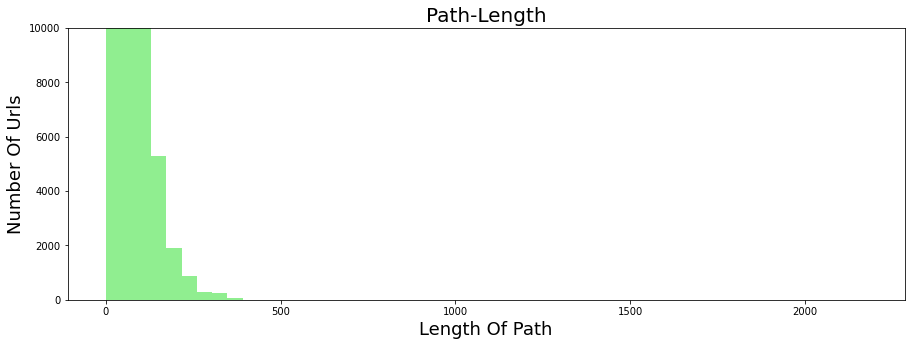

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(data['path_length'],bins=50,color='Lightgreen')
plt.title("Path-Length",fontsize=20)
plt.xlabel("Length Of Path",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,10000)

In [ ]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

data['fd_length'] = data['url'].apply(lambda i: fd_length(i))

(0.0, 1000.0)

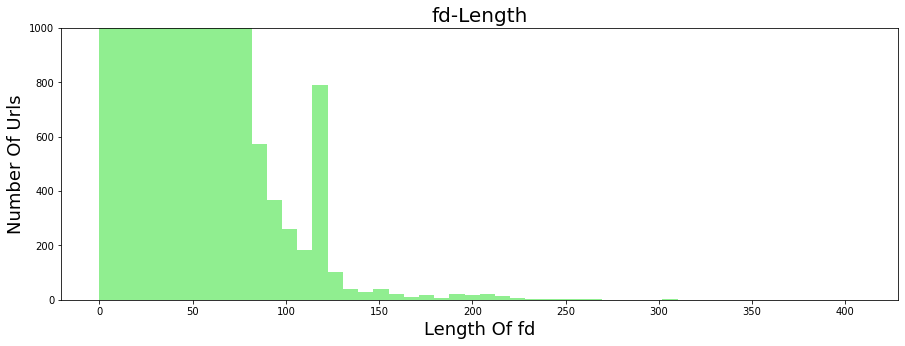

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(data['fd_length'],bins=50,color='Lightgreen')
plt.title("fd-Length",fontsize=20)
plt.xlabel("Length Of fd",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

In [ ]:
data.head()

,url,type,Category,url_len,hostname_length,path_length,fd_length
0,br-icloud.com.br,phishing,2,16,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,7
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,17,10,9
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,9


In [ ]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
data['count_dir'] = data['url'].apply(lambda i: no_of_dir(i))

Text(0, 0.5, 'Number Of URLs')

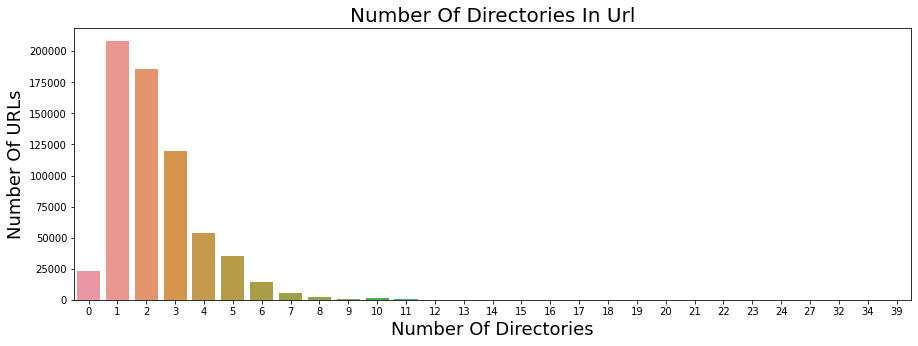

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=data)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [ ]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [ ]:
data.head()

,url,type,Category,url_len,hostname_length,path_length,fd_length,count_dir
0,br-icloud.com.br,phishing,2,16,0,16,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,5,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,7,3
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,17,10,9,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,9,1


In [ ]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))

In [ ]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

In [ ]:
data.head()

,url,type,Category,url_len,hostname_length,path_length,fd_length,count_dir,domain,@,...,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,16,0,16,0,0,br-icloud.com.br,0,...,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,5,2,mp3raid.com,0,...,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,7,3,bopsecrets.org,0,...,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,17,10,9,1,garage-pirenne.be,0,...,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,9,1,adventure-nicaragua.net,0,...,3,2,0,0,0,0,0,0,0,1


In [ ]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [ ]:
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

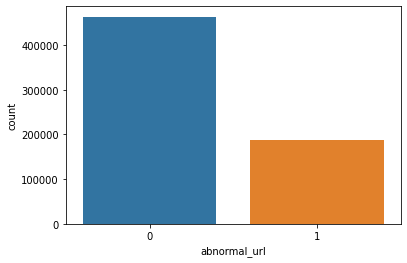

In [ ]:
sns.countplot(x='abnormal_url', data=data);

In [ ]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [ ]:
data['https'] = data['url'].apply(lambda i: httpSecure(i))

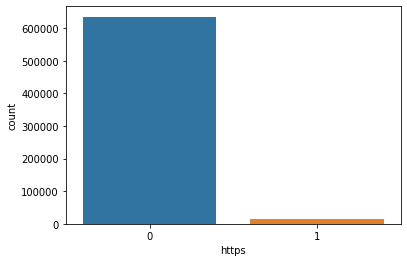

In [ ]:
sns.countplot(x='https', data=data);

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [ ]:
data['digits']= data['url'].apply(lambda i: digit_count(i))

In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [ ]:
data['letters']= data['url'].apply(lambda i: letter_count(i))

In [ ]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

In [ ]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))

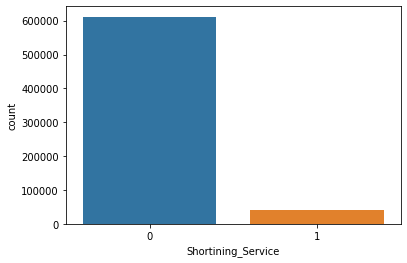

In [ ]:
sns.countplot(x='Shortining_Service', data=data);

In [ ]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [ ]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

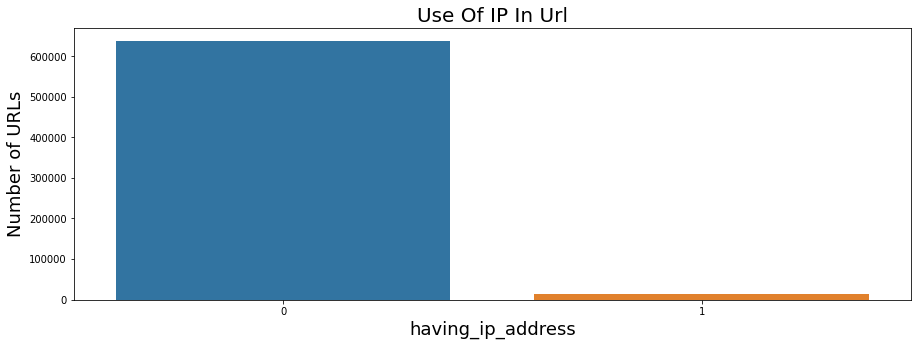

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)

sns.countplot(data['having_ip_address'])
plt.ylabel("Number of URLs",fontsize=18)

In [ ]:
data['having_ip_address'].value_counts()

0    638703
1     12488
Name: having_ip_address, dtype: int64

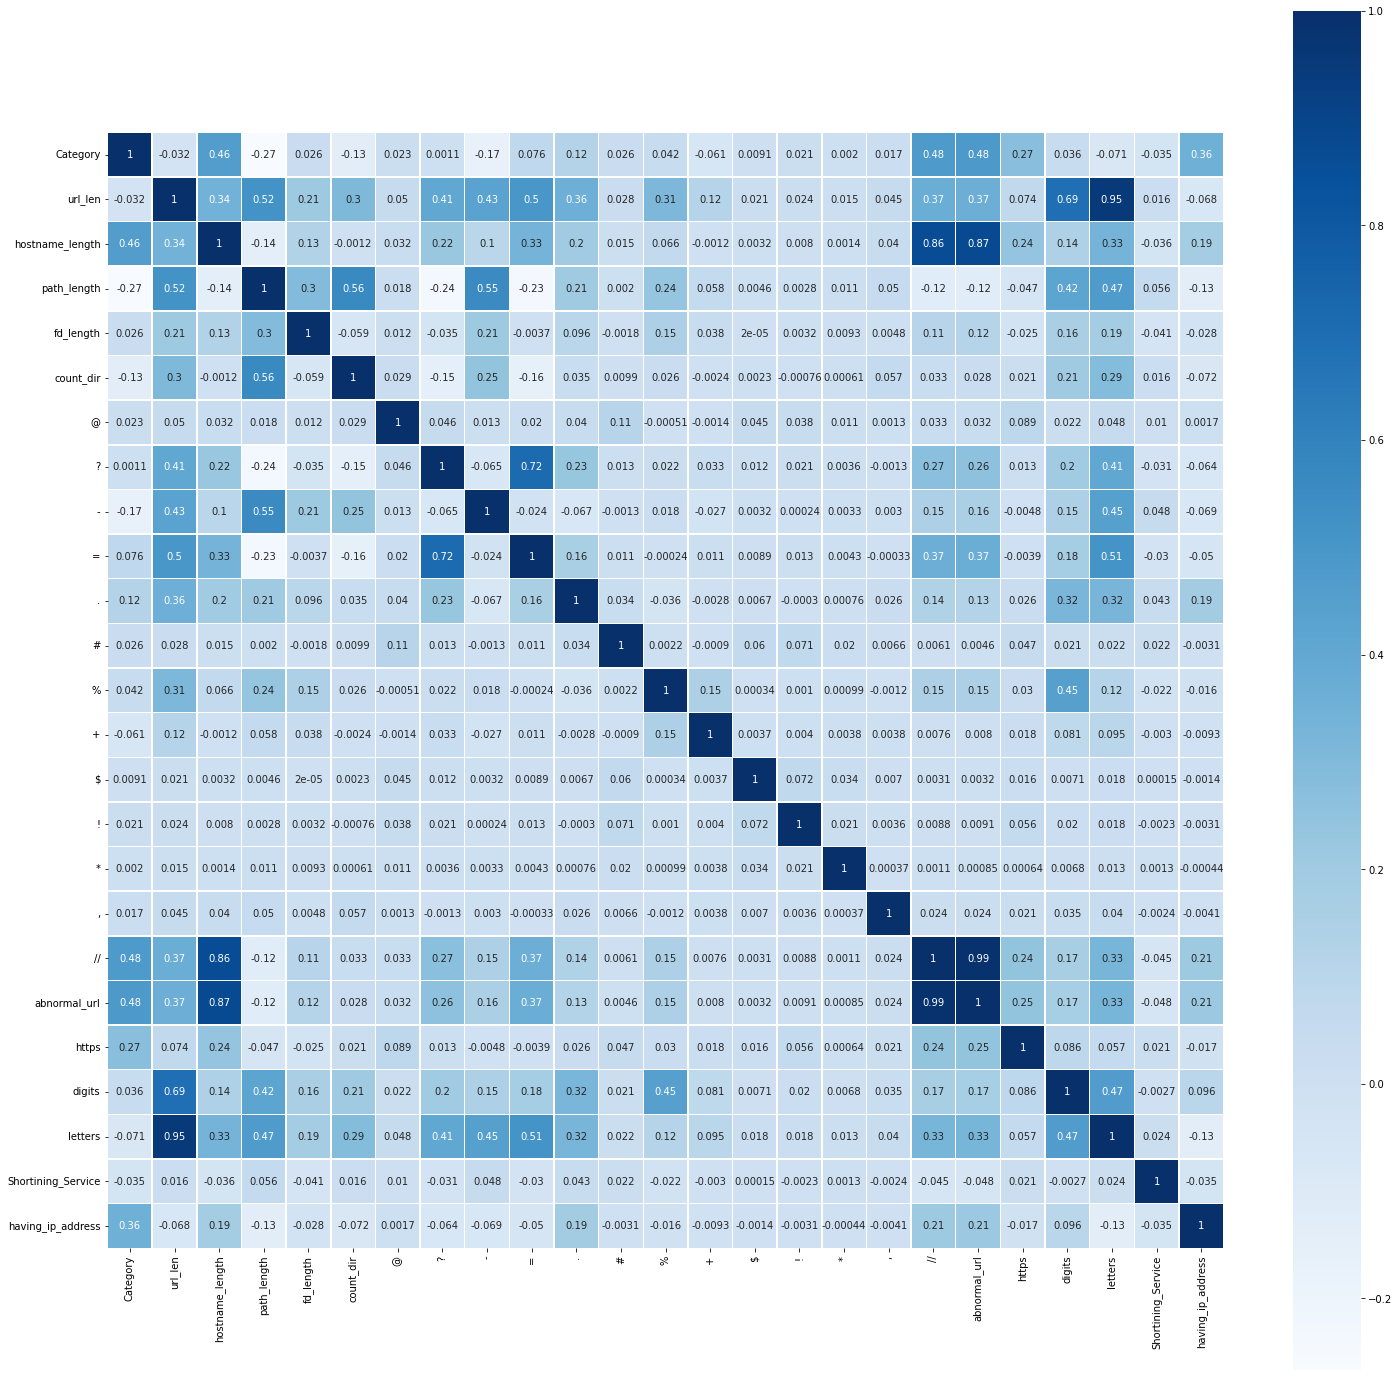

In [ ]:
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(),square=True, annot = True,linewidths=0.5 ,cmap="Blues")

In [ ]:
data.isnull().sum()

url                       0
type                      0
Category                  0
url_len                   0
hostname_length           0
path_length               0
fd_length                 0
count_dir                 0
domain                12223
@                         0
?                         0
-                         0
=                         0
.                         0
#                         0
%                         0
+                         0
$                         0
!                         0
*                         0
,                         0
//                        0
abnormal_url              0
https                     0
digits                    0
letters                   0
Shortining_Service        0
having_ip_address         0
dtype: int64

In [ ]:
data.dropna()

,url,type,Category,url_len,hostname_length,path_length,fd_length,count_dir,domain,@,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,2,16,0,16,0,0,br-icloud.com.br,0,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,5,2,mp3raid.com,0,...,0,0,0,0,0,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,7,3,bopsecrets.org,0,...,0,0,0,0,0,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,17,10,9,1,garage-pirenne.be,0,...,0,0,0,1,1,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,9,1,adventure-nicaragua.net,0,...,0,0,0,1,1,0,22,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,39,0,39,7,3,xbox360.ign.com,0,...,0,0,0,0,0,0,12,21,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44,0,44,8,4,games.teamxbox.com,0,...,0,0,0,0,0,0,7,29,1,0
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,38,0,38,7,4,gamespot.com,0,...,0,0,0,0,0,0,3,30,1,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45,0,45,4,2,en.wikipedia.org,0,...,0,0,0,0,0,0,0,36,0,0


In [ ]:
data.head()

,url,type,Category,url_len,hostname_length,path_length,fd_length,count_dir,domain,@,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,2,16,0,16,0,0,br-icloud.com.br,0,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,5,2,mp3raid.com,0,...,0,0,0,0,0,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,7,3,bopsecrets.org,0,...,0,0,0,0,0,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,17,10,9,1,garage-pirenne.be,0,...,0,0,0,1,1,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,9,1,adventure-nicaragua.net,0,...,0,0,0,1,1,0,22,199,0,0


In [ ]:
data.dtypes

url                   object
type                  object
Category               int64
url_len                int64
hostname_length        int64
path_length            int64
fd_length              int64
count_dir              int64
domain                object
@                      int64
?                      int64
-                      int64
=                      int64
.                      int64
#                      int64
%                      int64
+                      int64
$                      int64
!                      int64
*                      int64
,                      int64
//                     int64
abnormal_url           int64
https                  int64
digits                 int64
letters                int64
Shortining_Service     int64
having_ip_address      int64
dtype: object

In [ ]:
X = data.drop(['url','type','Category','domain'],axis=1) #,'type_code'
y = data['Category']

In [ ]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,auc

In [ ]:
#Random Forest Classifier
#because we are dealing with multiclass data and so, the one versus rest strategy is used.
#learn to predict each class against the other.

RF=OneVsRestClassifier( RandomForestClassifier(max_features=0.2))
RF.fit(X_train_norm,y_train)
y_pred =RF.predict(X_test_norm)
pred_prob = RF.predict_proba(X_test_norm)

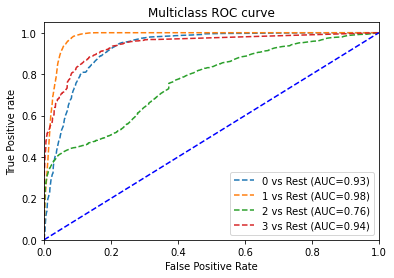

In [ ]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

In [ ]:
X_train = X_train.fillna(X_train.mean())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   url                 651191 non-null  object
 1   type                651191 non-null  object
 2   Category            651191 non-null  int64 
 3   url_len             651191 non-null  int64 
 4   hostname_length     651191 non-null  int64 
 5   path_length         651191 non-null  int64 
 6   fd_length           651191 non-null  int64 
 7   count_dir           651191 non-null  int64 
 8   domain              638968 non-null  object
 9   @                   651191 non-null  int64 
 10  ?                   651191 non-null  int64 
 11  -                   651191 non-null  int64 
 12  =                   651191 non-null  int64 
 13  .                   651191 non-null  int64 
 14  #                   651191 non-null  int64 
 15  %                   651191 non-null  int64 
 16  + 

In [ ]:
data.dropna()

,url,type,Category,url_len,hostname_length,path_length,fd_length,count_dir,domain,@,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,2,16,0,16,0,0,br-icloud.com.br,0,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,5,2,mp3raid.com,0,...,0,0,0,0,0,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,7,3,bopsecrets.org,0,...,0,0,0,0,0,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,17,10,9,1,garage-pirenne.be,0,...,0,0,0,1,1,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,10,9,1,adventure-nicaragua.net,0,...,0,0,0,1,1,0,22,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,39,0,39,7,3,xbox360.ign.com,0,...,0,0,0,0,0,0,12,21,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44,0,44,8,4,games.teamxbox.com,0,...,0,0,0,0,0,0,7,29,1,0
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,38,0,38,7,4,gamespot.com,0,...,0,0,0,0,0,0,3,30,1,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45,0,45,4,2,en.wikipedia.org,0,...,0,0,0,0,0,0,0,36,0,0


In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.10456025, 0.36998796, 0.2288531 , 0.17401574, 0.11096962,
       0.00047799, 0.06482899, 0.03571323, 0.10758586, 0.08286853,
       0.        , 0.02051685, 0.00647077, 0.        , 0.        ,
       0.        , 0.00169174, 0.32566552, 0.3258826 , 0.03097727,
       0.08311574, 0.10718898, 0.00274338, 0.05424304])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

hostname_length       0.369988
abnormal_url          0.325883
//                    0.325666
path_length           0.228853
fd_length             0.174016
count_dir             0.110970
=                     0.107586
letters               0.107189
url_len               0.104560
digits                0.083116
.                     0.082869
?                     0.064829
having_ip_address     0.054243
-                     0.035713
https                 0.030977
%                     0.020517
+                     0.006471
Shortining_Service    0.002743
,                     0.001692
@                     0.000478
$                     0.000000
!                     0.000000
*                     0.000000
#                     0.000000
dtype: float64

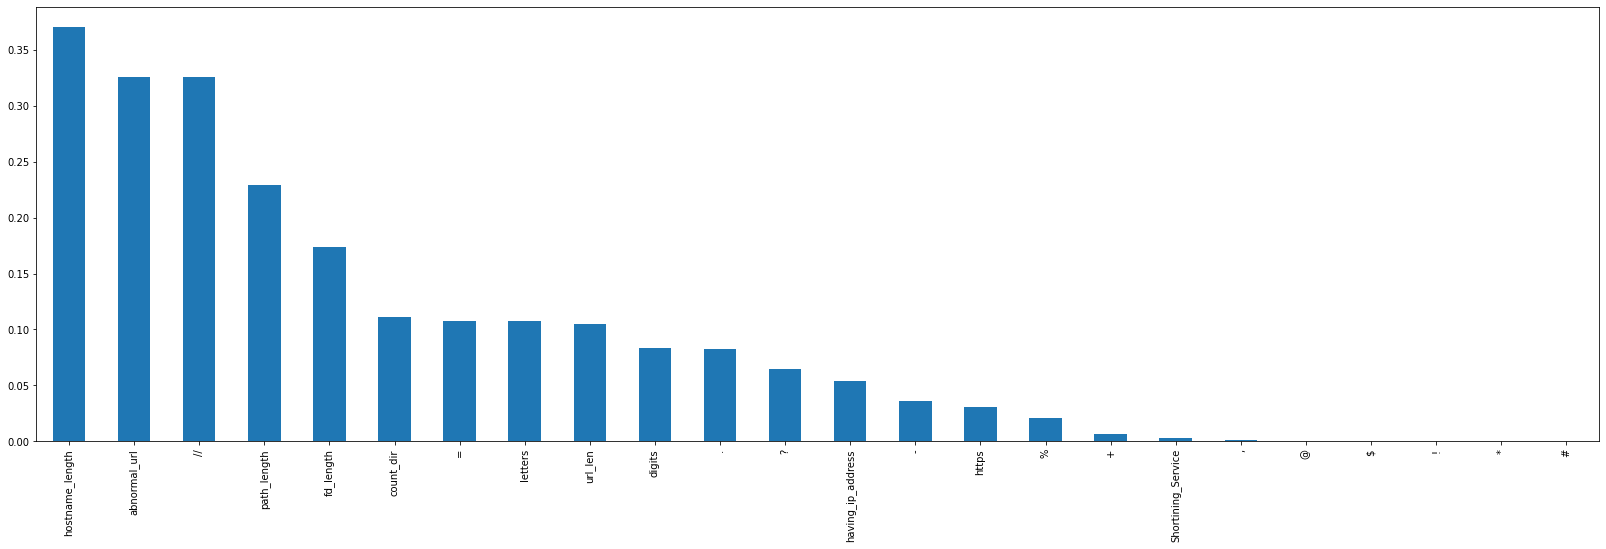

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(28, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 15 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=15)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['url_len', 'hostname_length', 'path_length', 'fd_length', 'count_dir',
       '?', '-', '=', '.', '//', 'abnormal_url', 'https', 'digits', 'letters',
       'having_ip_address'],
      dtype='object')

7.  Training Models 


#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  92.56%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     85565
           1       0.97      0.98      0.98     19319
           2       0.78      0.70      0.74     18805
           3       0.96      0.94      0.95      6550

    accuracy                           0.93    130239
   macro avg       0.91      0.90      0.90    130239
weighted avg       0.92      0.93      0.92    130239

             Confusion_matrix 


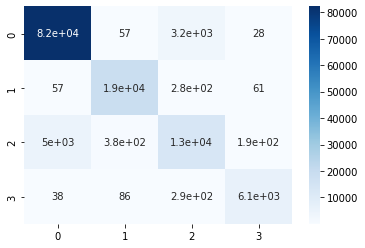

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  93.51%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     85565
           1       0.97      0.99      0.98     19319
           2       0.83      0.71      0.76     18805
           3       0.99      0.94      0.96      6550

    accuracy                           0.94    130239
   macro avg       0.93      0.90      0.92    130239
weighted avg       0.93      0.94      0.93    130239

             Confusion_matrix 


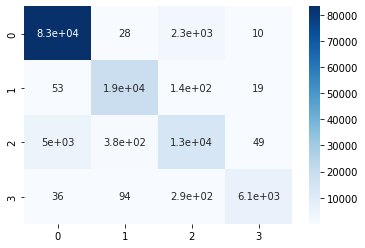

###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  91.71%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     85565
           1       0.92      0.97      0.95     19319
           2       0.79      0.64      0.71     18805
           3       0.95      0.90      0.93      6550

    accuracy                           0.92    130239
   macro avg       0.90      0.87      0.88    130239
weighted avg       0.91      0.92      0.91    130239

             Confusion_matrix 


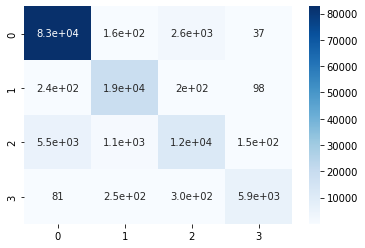

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 
Test Accuracy :  93.47%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     85565
           1       0.97      0.99      0.98     19319
           2       0.83      0.70      0.76     18805
           3       0.99      0.93      0.96      6550

    accuracy                           0.93    130239
   macro avg       0.93      0.90      0.92    130239
weighted avg       0.93      0.93      0.93    130239

             Confusion_matrix 


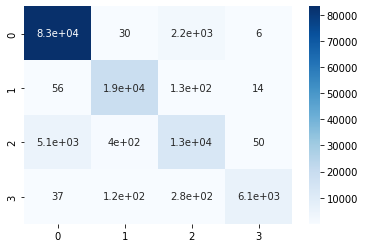

###################- End -###################


In [ ]:
models = [DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,
         ExtraTreesClassifier]
accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train,y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix, annot=True,cmap="Blues" )
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

In [ ]:
output = pd.DataFrame({"Model":['Decision Tree Classifier','Random Forest Classifier',
                                'KNeighbors Classifier',
                                'Extra Trees Classifier'],
                      "Accuracy":accuracy_test})

In [ ]:
output